In [13]:
# REMOVER FASTBS
# TROCAR COR DE PLOTS
# PAIRPLOT DE TODAS VARIAVEIS
# ENTENDER PQ COLESTHEROL ESTA 0





import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download do dataset
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# Leitura do dataset
df = pd.read_csv(f"{path}/heart.csv")
print("\nPrimeiras linhas do dataset:")
print(df.head())

# Separar variáveis (X) e alvo (y)
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

# Separar variáveis contínuas e categóricas/binárias
features_cont = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
features_bin = [col for col in X.columns if col not in features_cont]

print("\nVariáveis CONTÍNUAS:")
print(", ".join(features_cont))
print("\nVariáveis CATEGÓRICAS ou BINÁRIAS:")
print(", ".join(features_bin))


Primeiras linhas do dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Variáveis CONTÍNUAS:
Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak

Variáveis CATEGÓRICAS ou BINÁRIAS:
Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope


Carregando Dataset, separando variáveis contínuas e categóricas/binárias.

=== Bloco de Análise Exploratória ===


=== 0. Verificação de Dados Faltantes ===
Não há dados faltantes.

=== 1. Histogramas das variáveis contínuas por classe ===


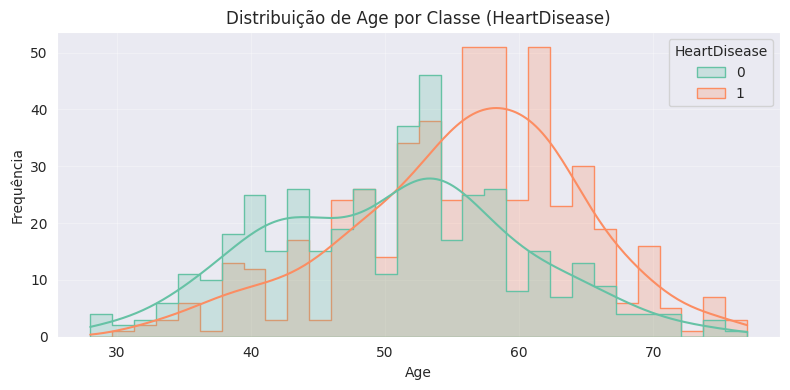

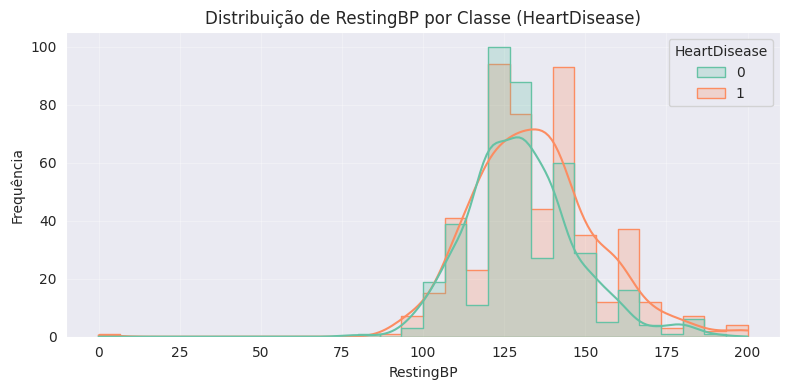

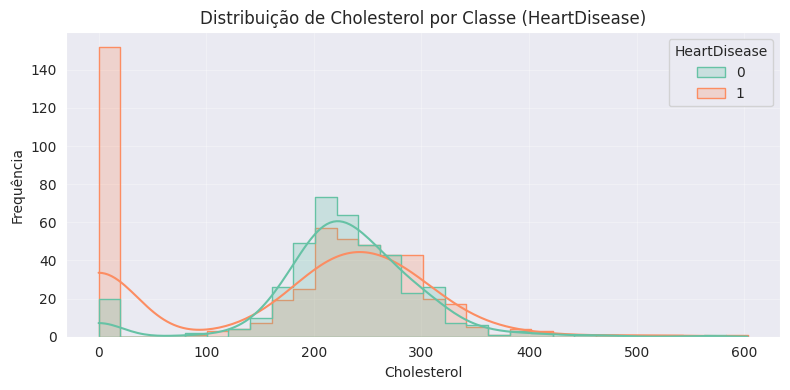

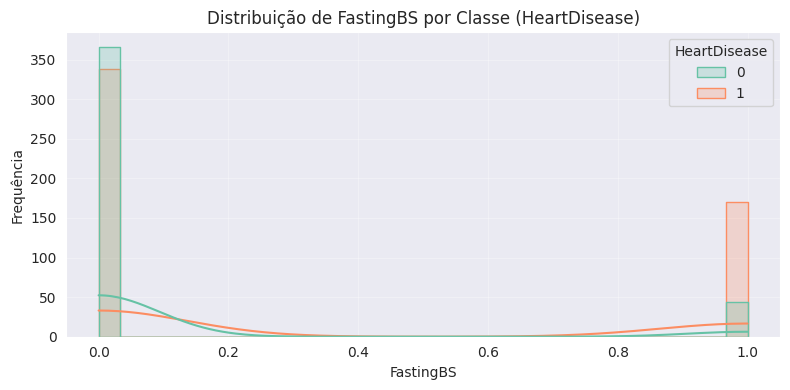

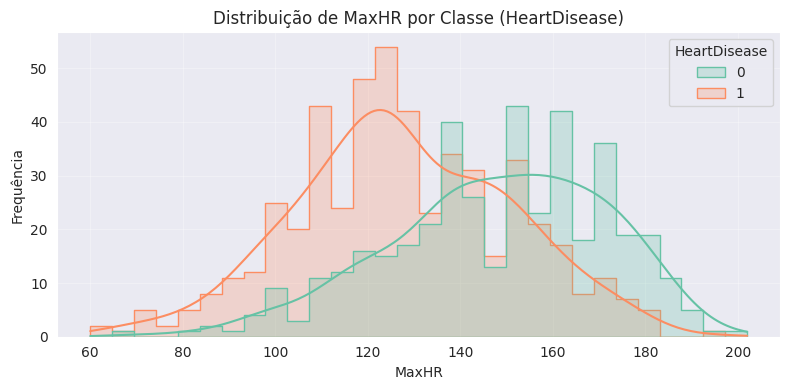

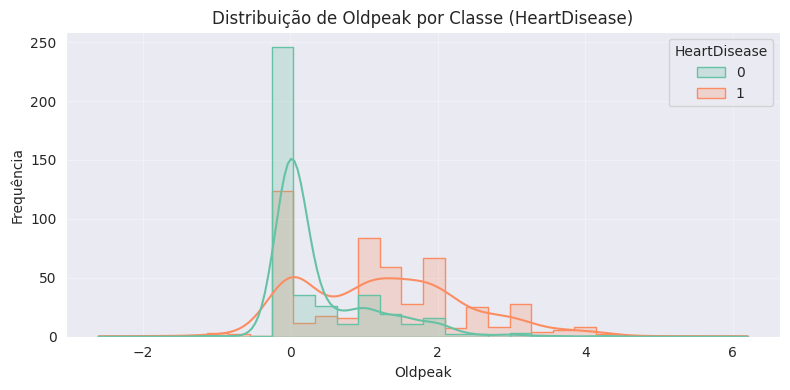


=== 3. Distribuição de Sexo por classe ===


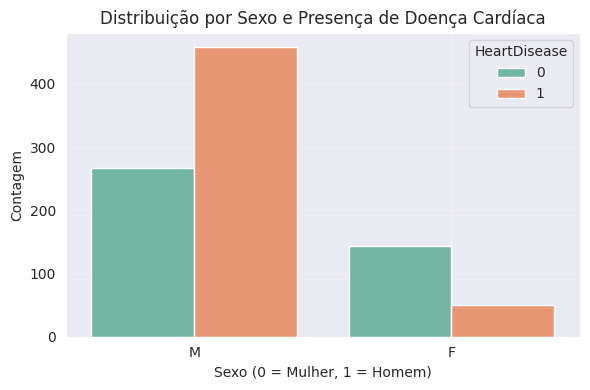


=== 4. Tipo de Dor no Peito por Classe ===


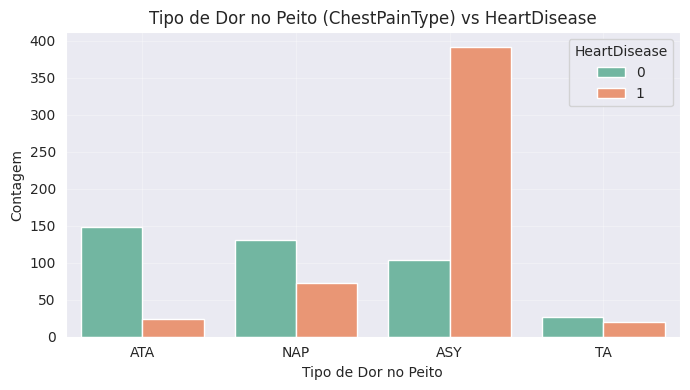


=== 5. Presença de Angina por Esforço por classe ===


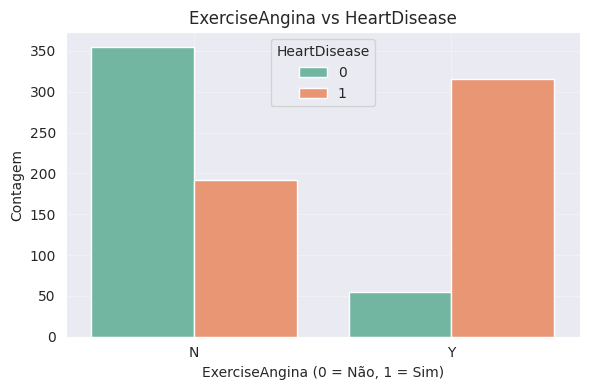


=== 6. Dispersão entre todas as variáveis contínuas ===


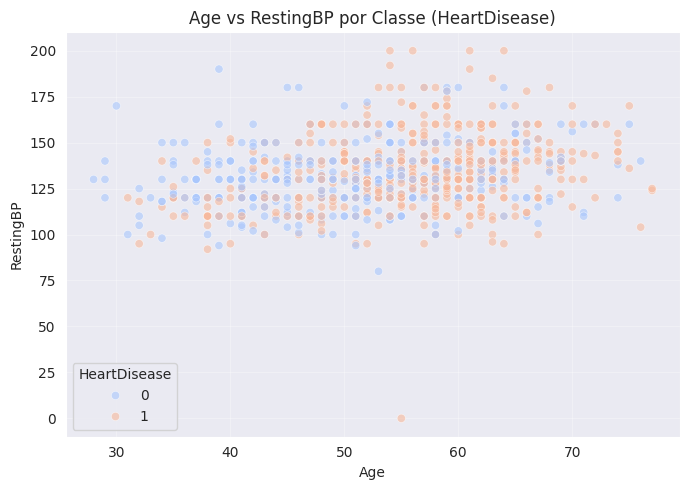

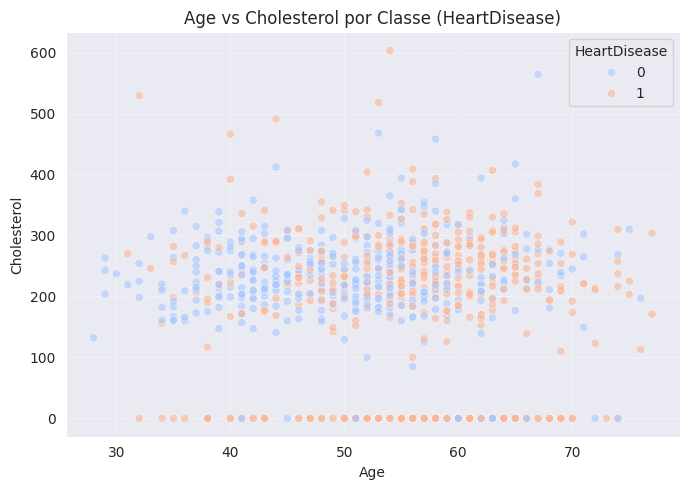

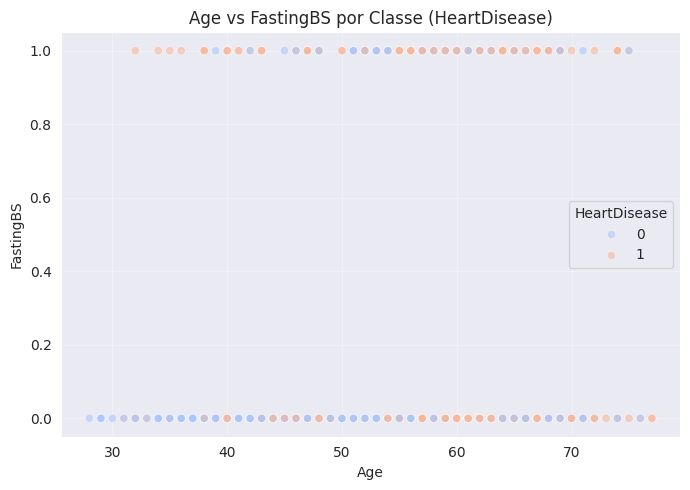

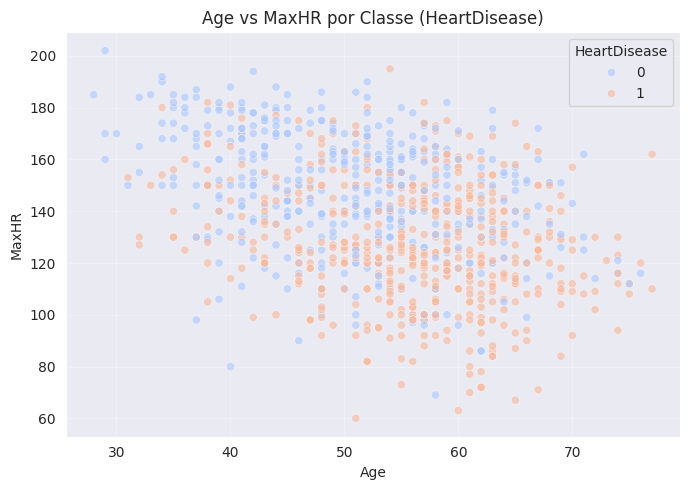

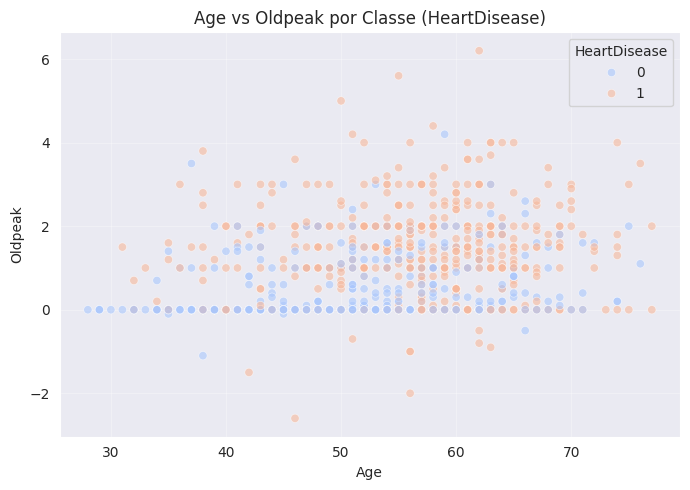

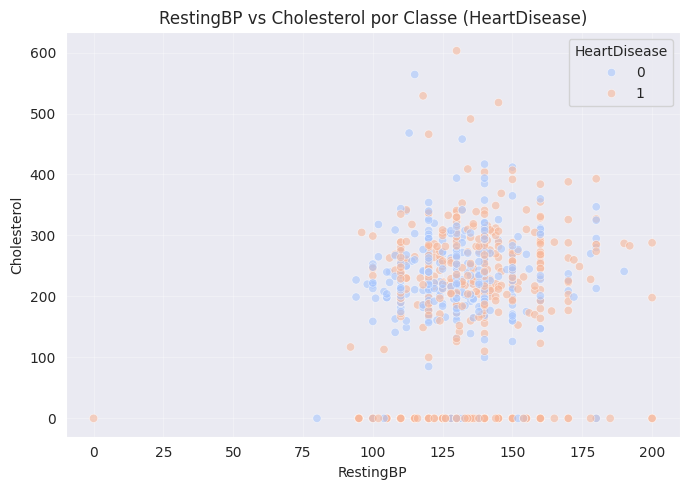

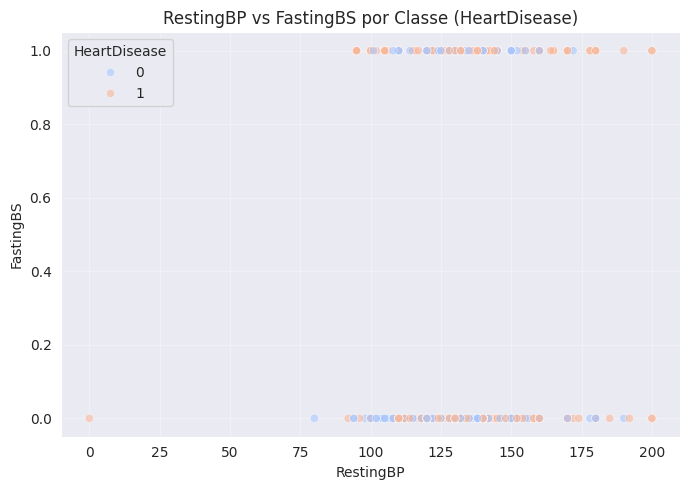

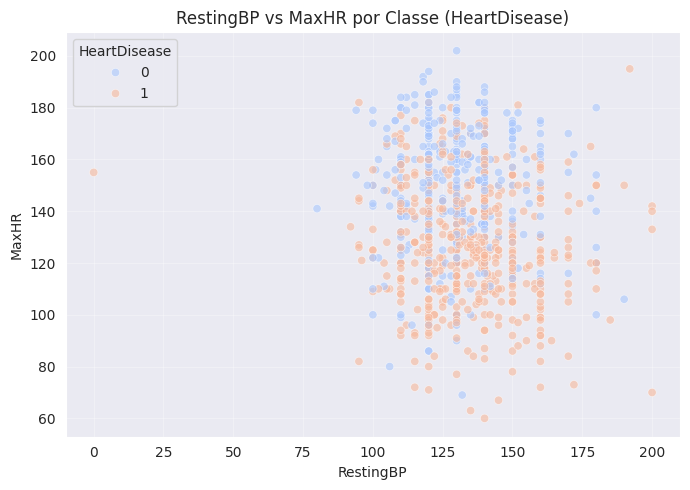

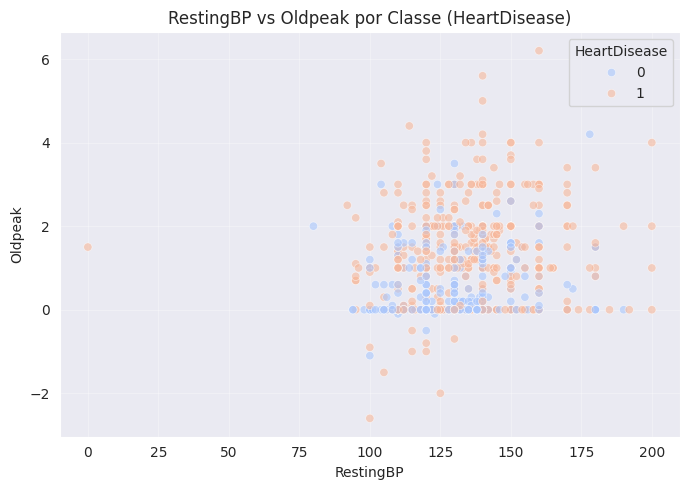

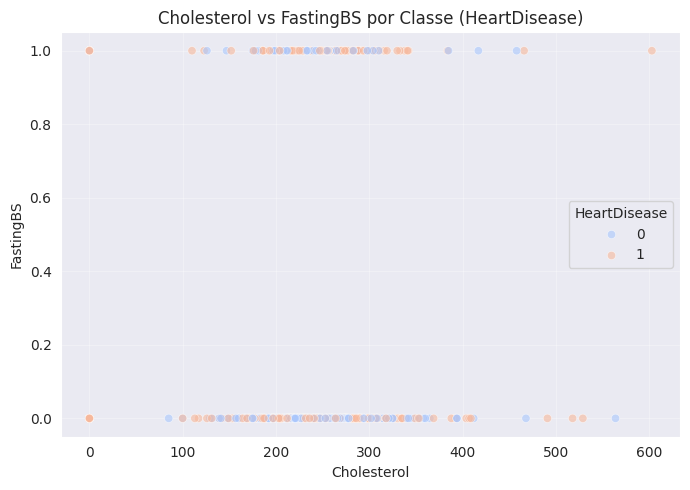

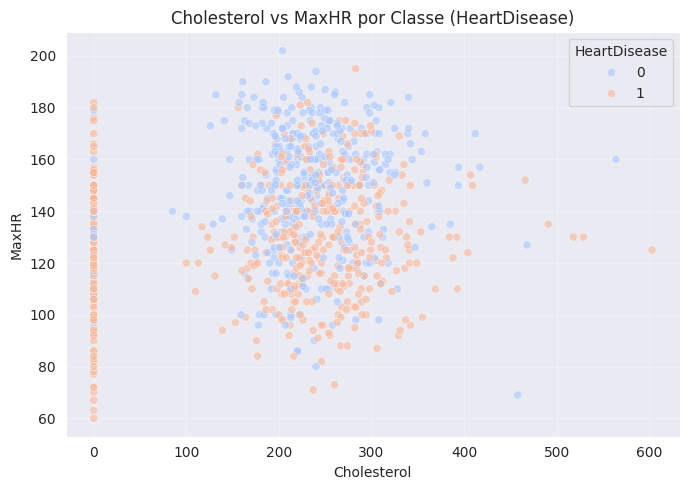

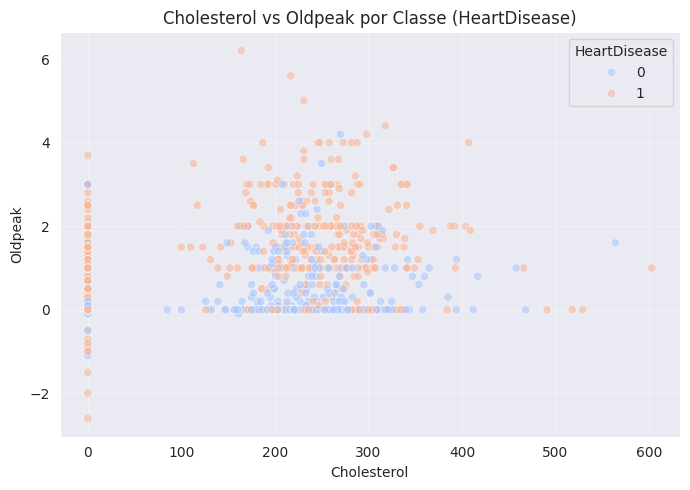

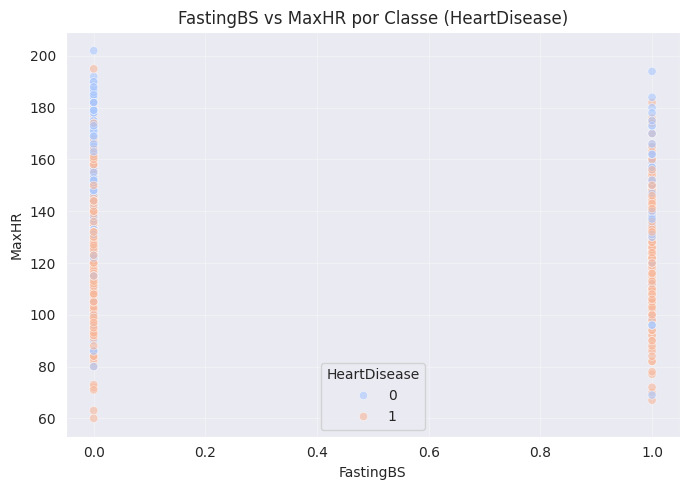

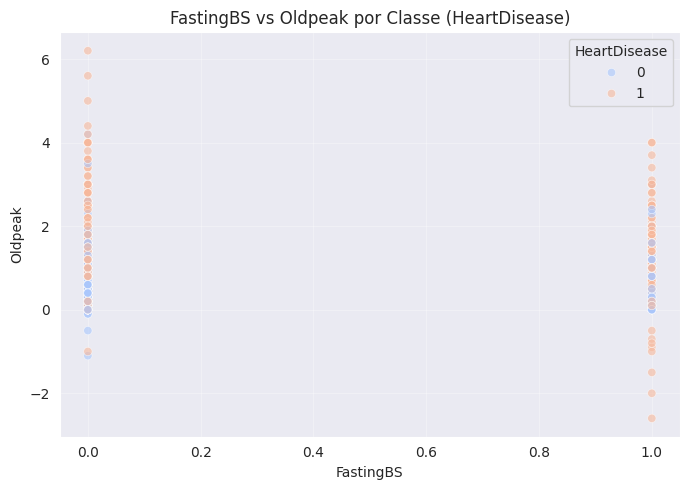

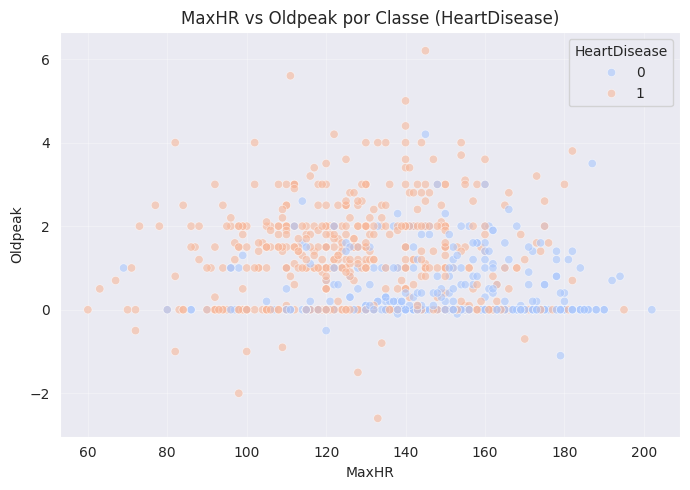

In [12]:
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Bloco de Análise Exploratória ===\n")

# 0. Verificar se há valores faltantes
def verificar_faltantes(df):
    faltantes = df.isnull().sum()
    print("\n=== 0. Verificação de Dados Faltantes ===")
    if (faltantes == 0).all():
        print("Não há dados faltantes.")
    else:
        print(faltantes[faltantes > 0])

verificar_faltantes(df)

# 1. Histogramas das variáveis contínuas por classe
print("\n=== 1. Histogramas das variáveis contínuas por classe ===")
for feature in features_cont:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, bins=30, palette='Set2', element='step')
    plt.title(f'Distribuição de {feature} por Classe (HeartDisease)')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# # 2. Boxplots das variáveis contínuas por classe
# print("\n=== 2. Boxplots das variáveis contínuas por classe ===")
# for feature in features_cont:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(data=df, x='HeartDisease', y=feature)
#     plt.title(f'Boxplot de {feature} por Classe')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

# 3. Countplot de Sexo (binária)
print("\n=== 3. Distribuição de Sexo por classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='Set2')
plt.title('Distribuição por Sexo e Presença de Doença Cardíaca')
plt.xlabel('Sexo (0 = Mulher, 1 = Homem)')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Countplot de Tipo de Dor no Peito (categórica)
print("\n=== 4. Tipo de Dor no Peito por Classe ===")
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='Set2')
plt.title('Tipo de Dor no Peito (ChestPainType) vs HeartDisease')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Countplot de Angina por Esforço (binária)
print("\n=== 5. Presença de Angina por Esforço por classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', palette='Set2')
plt.title('ExerciseAngina vs HeartDisease')
plt.xlabel('ExerciseAngina (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Scatterplot entre todos os pares de variáveis contínuas
print("\n=== 6. Dispersão entre todas as variáveis contínuas ===")
feature_pairs = list(combinations(features_cont, 2))

for f1, f2 in feature_pairs:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x=f1, y=f2, hue='HeartDisease', palette='coolwarm', alpha=0.6)
    plt.title(f'{f1} vs {f2} por Classe (HeartDisease)')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
